## Clustering Using K-Means

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

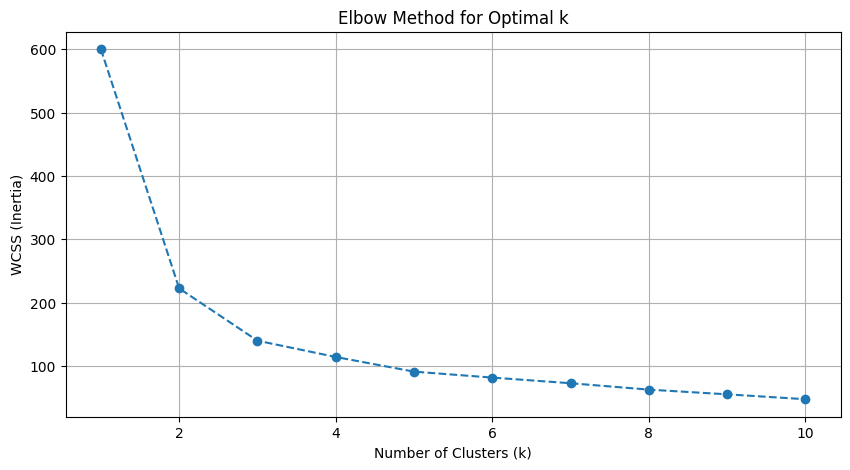

In [4]:
iris = load_iris();
X = iris.data
scaler = StandardScaler();
X_scaled = scaler.fit_transform(X);
#inertia
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans (n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5));
plt.plot(k_range, wcss, marker="o", linestyle="--");
plt.title("Elbow Method for Optimal k");
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [6]:
y_kmeans = kmeans.fit_predict(X_scaled);
iris_df = pd.DataFrame (X, columns=iris.feature_names)
iris_df['cluster'] = y_kmeans
print(iris_df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   cluster  
0        6  
1        2  
2        2  
3        2  
4        6  
5        0  
6        6  
7        6  
8        2  


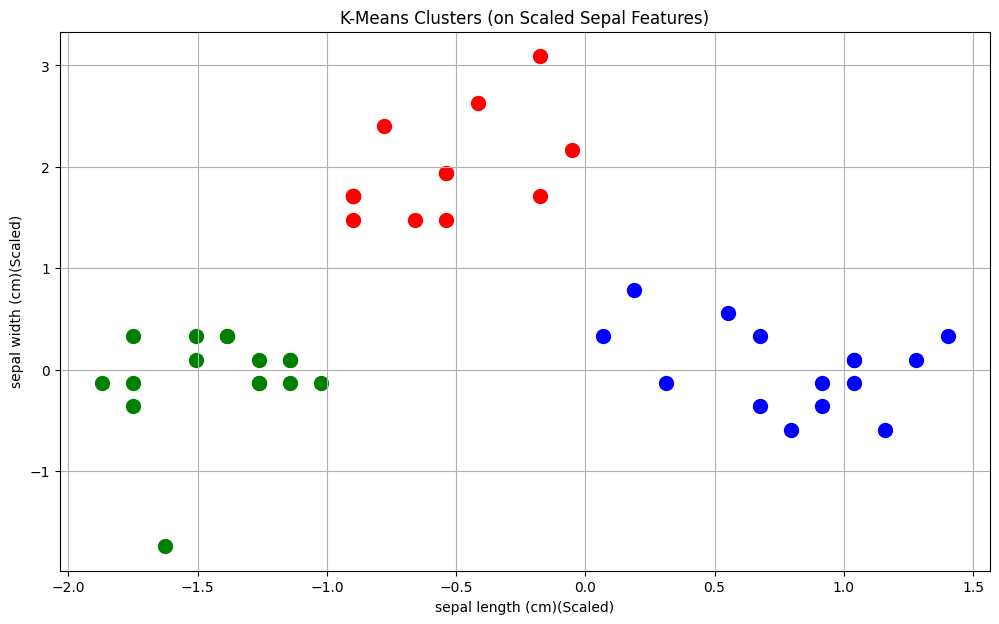

In [7]:
plt.figure(figsize=(12,7))
plt.scatter (X_scaled [y_kmeans == 0, 0], X_scaled [y_kmeans == 0, 1], s = 100, c='red', label = 'Cluster 1')
plt.scatter(X_scaled [y_kmeans == 1, 0 ] , X_scaled [y_kmeans == 1, 1], s = 100, c='blue', label = 'Cluster 2')
plt.scatter (X_scaled [y_kmeans == 2, 0], X_scaled [y_kmeans == 2, 1], s = 100, c='green', label = 'Cluster 3')
plt.title('K-Means Clusters (on Scaled Sepal Features)')
plt.xlabel(iris.feature_names [0] + '(Scaled)')
plt.ylabel(iris.feature_names [1] + '(Scaled)')
plt.grid(True)
plt.show()

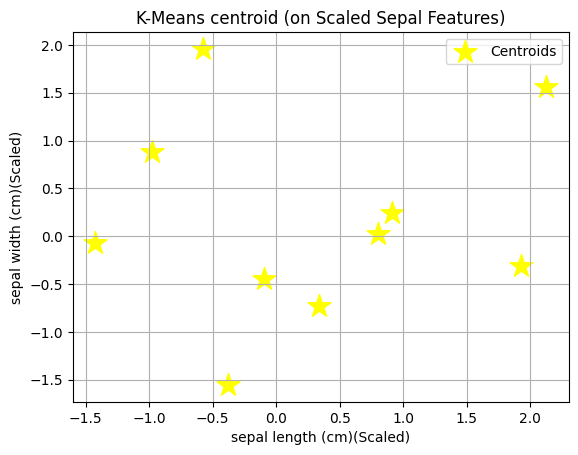

In [9]:
centroids = kmeans.cluster_centers_
plt.scatter (centroids [:, 0], centroids[:, 1], s = 300, c='yellow', marker='*', label='Centroids')
plt.legend()
plt.title('K-Means centroid (on Scaled Sepal Features)')
plt.xlabel(iris.feature_names [0] + '(Scaled)')
plt.ylabel(iris.feature_names [1] + '(Scaled)')
plt.grid(True)
plt.show()